# USA Accidents Severity Prediction

The economic and societal impact of traffic accidents cost U.S. citizens hundreds of billions of dollars every year. And a large part of losses is caused by a small number of serious accidents. Reducing traffic accidents, especially serious accidents, is nevertheless always an important challenge. The proactive approach, one of the two main approaches for dealing with traffic safety problems, focuses on preventing potential unsafe road conditions from occurring in the first place. For the effective implementation of this approach, accident prediction and severity prediciton are critical. If we can identify the patterns of how these serious accidents happen and the key factors, we might be able to implement well-informed actions and better allocate financial and human resources.

# Objectives

The first objective of this project is to recognize key factors affecting the accident severity. The second one is to develop a model that can accurately predict accident severity. To be specific, for a given accident, without any detailed information about itself, like driver attributes or vehicle type, this model is supposed to be able to predict the likelihood of this accident being a severe one. The accident could be the one that just happened and still lack of detailed information, or a potential one predicted by other models. Therefore, with the sophisticated real-time traffic accident prediction solution developed by the creators of the same dataset used in this project, this model might be able to further predict severe accidents in real-time.

**Task**

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day.
Visualize accident hotspots and contributing factors.

# Overview the dataset

--- Details about features in the dataset:

**Traffic Attributes (12):**


* ID: This is a unique identifier of the accident record.

* Source: Indicates source of the accident report (i.e. the API which reported the accident.).

* TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

* Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* Start_Time: Shows start time of the accident in local time zone.

* End_Time: Shows end time of the accident in local time zone.

* Start_Lat: Shows latitude in GPS coordinate of the start point.

* Start_Lng: Shows longitude in GPS coordinate of the start point.

* End_Lat: Shows latitude in GPS coordinate of the end point.

* End_Lng: Shows longitude in GPS coordinate of the end point.

* Distance(mi): The length of the road extent affected by the accident.

* Description: Shows natural language description of the accident.

**Address Attributes (9):**

* Number: Shows the street number in address field.

* Street: Shows the street name in address field.

* Side: Shows the relative side of the street (Right/Left) in address field.

* City: Shows the city in address field.

* County: Shows the county in address field.

* State: Shows the state in address field.

* Zipcode: Shows the zipcode in address field.

* Country: Shows the country in address field.

* Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes (11):**

* Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.
    
* Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

* Temperature(F): Shows the temperature (in Fahrenheit).

* Wind_Chill(F): Shows the wind chill (in Fahrenheit).

* Humidity(%): Shows the humidity (in percentage).

* Pressure(in): Shows the air pressure (in inches).

* Visibility(mi): Shows visibility (in miles).

* Wind_Direction: Shows wind direction.

* Wind_Speed(mph): Shows wind speed (in miles per hour).

* Precipitation(in): Shows precipitation amount in inches, if there is any.

* Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**POI Attributes (13):**

* Amenity: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* Crossing: A POI annotation which indicates presence of crossing in a nearby location.
    
* Give_Way: A POI annotation which indicates presence of give_way sign in a nearby location.

* Junction: A POI annotation which indicates presence of junction in a nearby location.

* No_Exit: A POI annotation which indicates presence of no_exit sign in a nearby location.

* Railway: A POI annotation which indicates presence of railway in a nearby location.

* Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

* Station: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* Stop: A POI annotation which indicates presence of stop sign in a nearby location.

* Traffic_Calming: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

* Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

**Period-of-Day (4):**

* Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

* Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

* Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.
****************************************************************************************************

# We start by importing the relevant modules.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.shape

(2845342, 47)

In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

Get only those columns which has null values

In [9]:
missing_percentage[missing_percentage !=0]

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

Remove the columns that are looking unnecessary for our data

# Exploratory Analysis and Data Visualization

In [3]:
df['Start_Time'] = pd.to_datetime(df["Start_Time"], errors="coerce")
df['End_Time'] = pd.to_datetime(df["End_Time"], errors="coerce")
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day


In [4]:
df["Year"]=df["Start_Time"].dt.year
df["Hour"]=df["Start_Time"].dt.hour
df["Month"]=df["Start_Time"].dt.month
df["Day"]=df["Start_Time"].dt.day_name()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


# Insights

* Over 75% of accident visibility is 10 miles or less. (Even at 25%, it's still 10 Miles or less, showing the concentration of the distribution towards one point).
* The temperature has a mean of 62.5° F, with a range of [-45 , 196]. Beyond that, with a std of 19.3, we can assume a fairly wide temperature variability for the United States.
* More than 75% of wind speeds are at 10 mph or less, but there are instances of extreme wind, which can seriously affect accidents.


# Hourly Accident Analysis

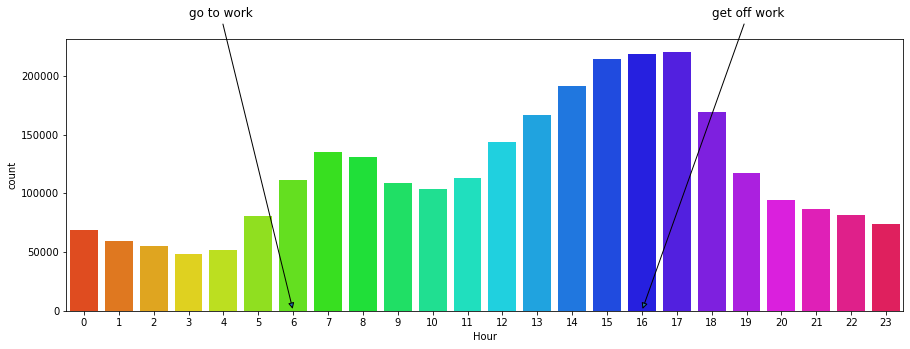

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(x="Hour", data= df, palette = "hsv")
plt.annotate('Morning Peak',xy=(6,350000), fontsize=12)
plt.annotate('Afternoon Peak',xy=(17,350000), fontsize=12)
plt.annotate('go to work',xy=(6,0),xytext=(3,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

**Insights**

Accidents more likely to happen in peak hours (Morning & evening). This could be explained by having more people on the road heading to work or business activities.

# Per Day Accident in a Week

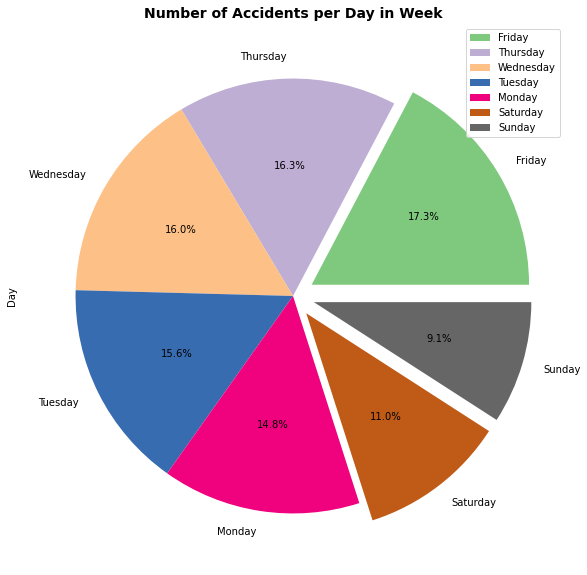

In [21]:
df['Day'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0.1, 0,0,0,0,0.1,0.1],cmap='Accent',legend=True,figsize=(10,10))
plt.title('Number of Accidents per Day in Week',fontsize=14, fontweight="bold")
plt.show()

**Insights**

There is a clear reduction in the number of accidents at weekends, with an average of -10.66% (note that this does not take into account peak times or big events, which could clearly influence these results).

# Month wise Accident Analysis

In [22]:
# Percentage of accidents in a Month

percent=(df['Month'].value_counts()/df['Day'].count()) * 100
percent

12    16.656803
11    12.676719
10    10.513007
9      8.498873
6      7.962523
1      6.971570
2      6.853130
5      6.394451
8      6.279386
4      6.040750
7      5.591982
3      5.560808
Name: Month, dtype: float64

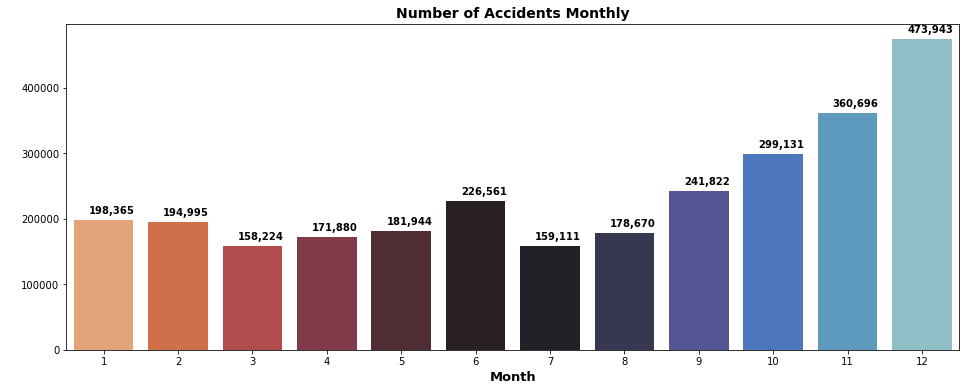

In [23]:
plt.figure(figsize = (16,6))
sns.countplot(x='Month', data= df, palette = "icefire_r")
plt.xlabel("Month", fontsize=13, fontweight="bold")
plt.ylabel(" ")
plt.title("Number of Accidents Monthly", fontsize=14, fontweight="bold")

ax = plt.gca()

for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y),weight='bold')
plt.show()

**Insights**

* December has the highest number of accidents.
* March has the lowest number of accidents.

# Analysis on Weekend Accidents

In [24]:
df["Is_Weekend"] = df["Day"].isin(["Saturday", "Sunday"])

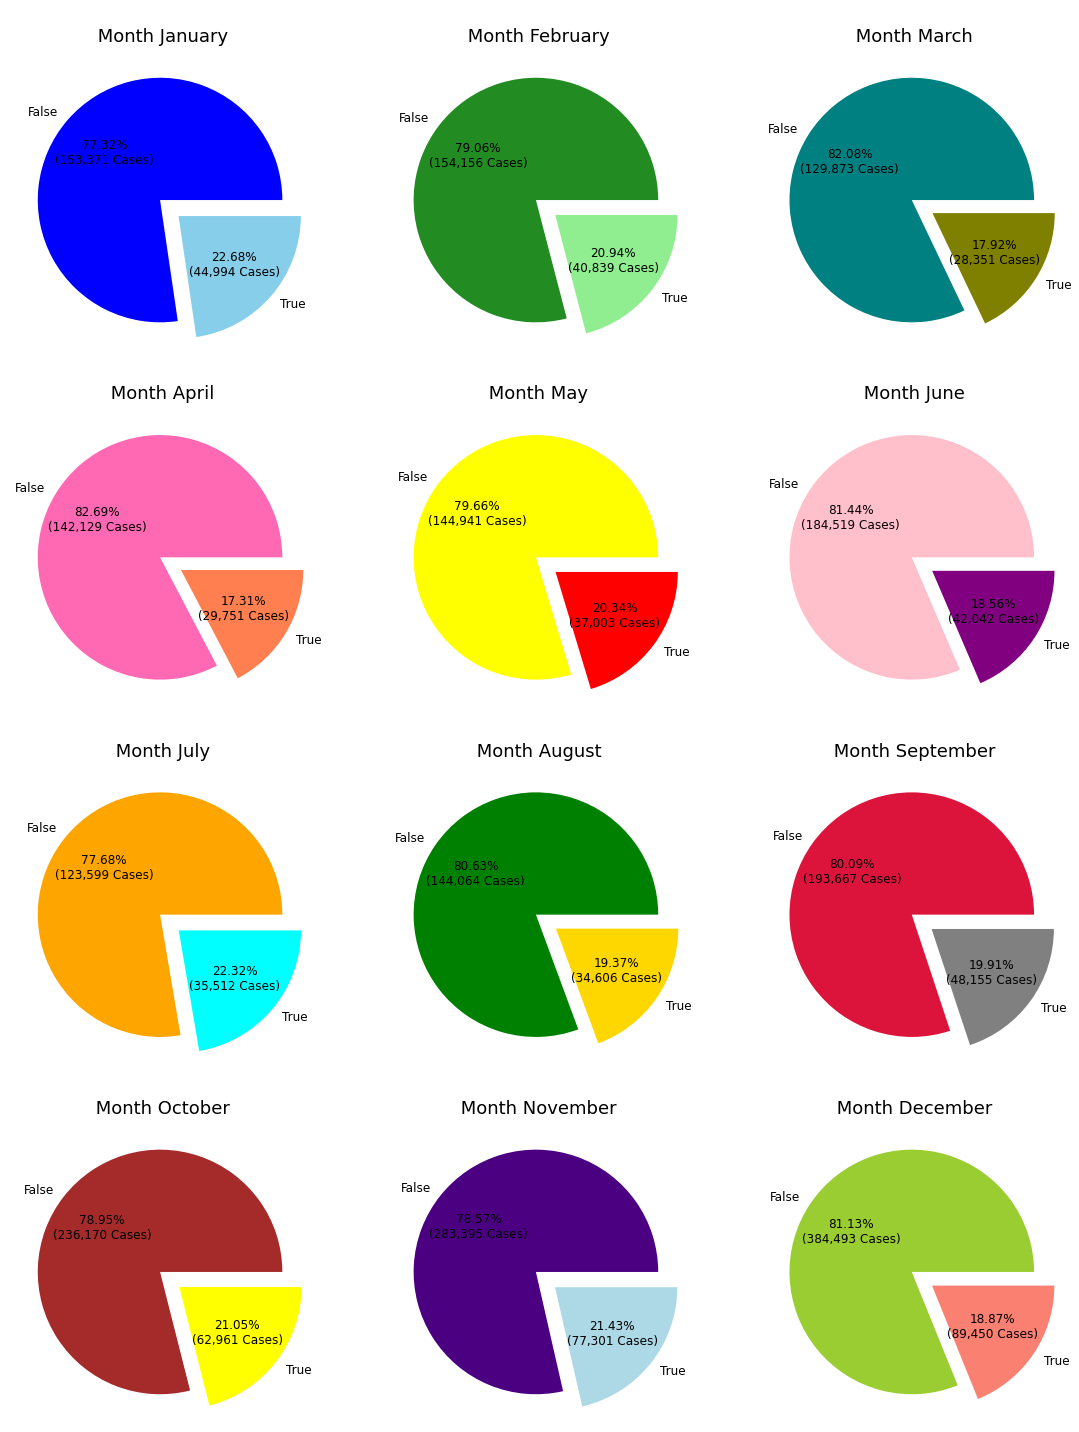

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
             8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

colors = [('blue', 'skyblue'), ('forestgreen','lightgreen'), ('teal', 'olive'), ('hotpink', 'coral'),
          ('yellow', 'red'), ('pink', 'purple'), ('orange', 'aqua'), ('green', 'gold'),
          ('crimson', 'grey'), ('brown', 'yellow'), ('indigo', 'lightblue'), ('yellowgreen', 'salmon')]



count = 0

def func(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i, ax in enumerate(axes.flatten()):
    month = i + 1
    size = list(df[df["Month"] == month]["Is_Weekend"].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']

    ax.pie(size, labels=labels, colors=colors[count],
           autopct=lambda pct: func(pct, size), labeldistance=1.1,
           textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\n Month {}'.format(month_map[month])

    ax.set_title(title, fontsize=18, color='black')

    count += 1
    
plt.tight_layout()
plt.show()


**Insights**

* January has the highest proportion of weekend accidents followed by july compared with weekday accidents, at 22.68% and 22.32%.
* April has the lowest proportion of weekend accidents,at 17.31%.

# Yearly Accident Count

In [58]:
df['Year'].value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Year, dtype: int64

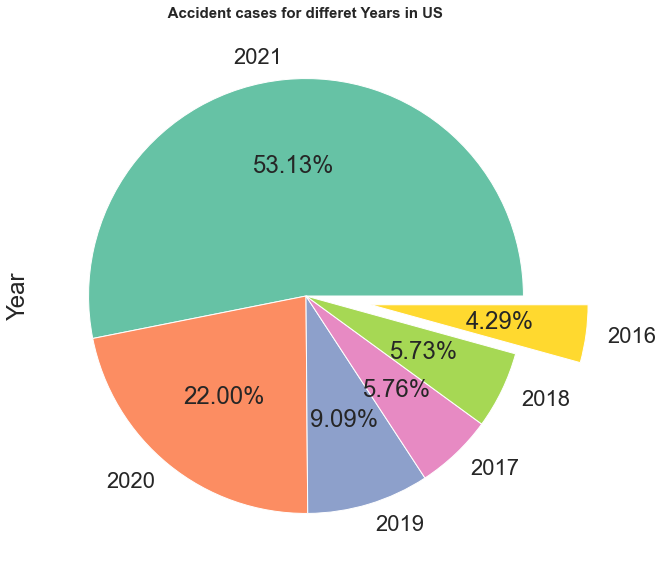

In [87]:
year_max_acc=df['Year'].value_counts()
year_max_acc.plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0,0,0,0.3],figsize=(10,10))
plt.title(" Accident cases for differet Years in US ",size=15,weight='bold')
plt.show()

**Insights**

* Year 2021 has 1511745 accidents(approx 53%) which was heighest,followed by Year 2020 includes 625864 accidents.
* Year 2016 has minimum accidents that is 122024.
* Accident count rapidly increases year by year in us.

# Accident prone Cities

In [26]:
cities_by_accident= df["City"].value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

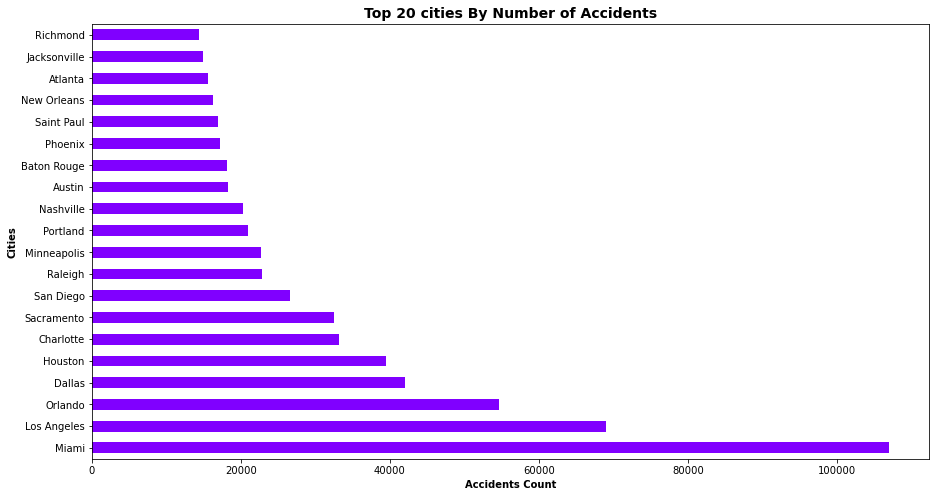

In [27]:
cities_by_accident[:20].plot(kind='barh',cmap='rainbow',figsize=(15,8))
plt.title('Top 20 cities By Number of Accidents',fontsize=14, fontweight="bold")
plt.ylabel('Cities',fontweight="bold")
plt.xlabel('Accidents Count',fontweight="bold")
plt.show()

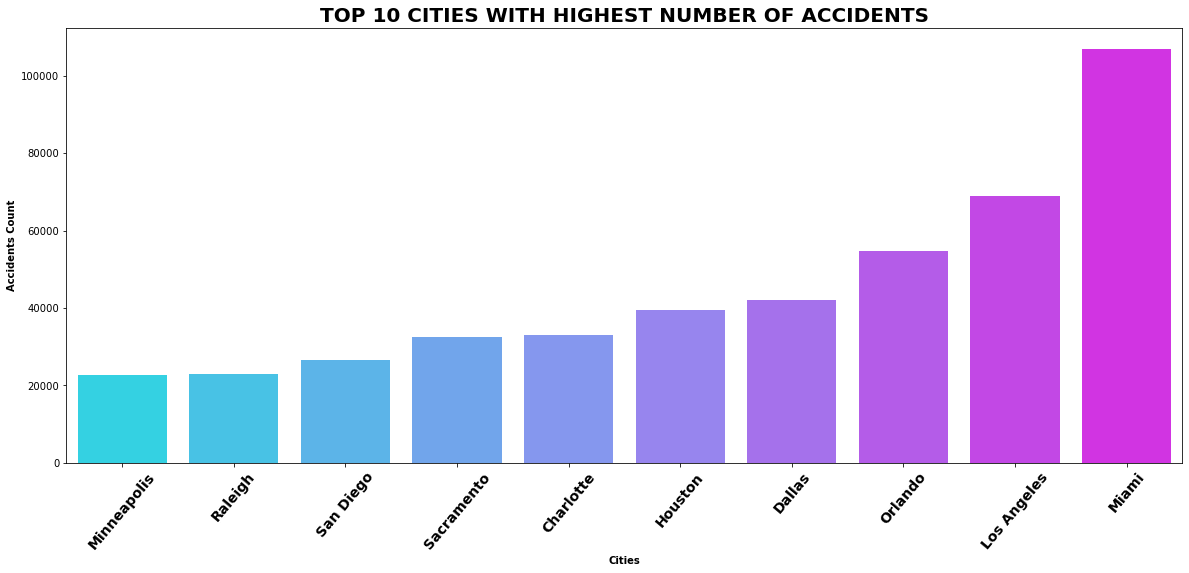

In [59]:
top_cities=df["City"].value_counts().sort_values()[-10:].reset_index()
top_cities.columns=["city","number_of_accidents"]

plt.figure(figsize=(20,8))
sns.barplot(x="city",y="number_of_accidents",data=top_cities , palette='cool')
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20,fontweight="bold")
plt.xlabel('Cities',fontweight="bold")
plt.ylabel('Accidents Count',fontweight="bold")
plt.xticks(fontweight="bold",fontsize=14,rotation=50)
plt.show()

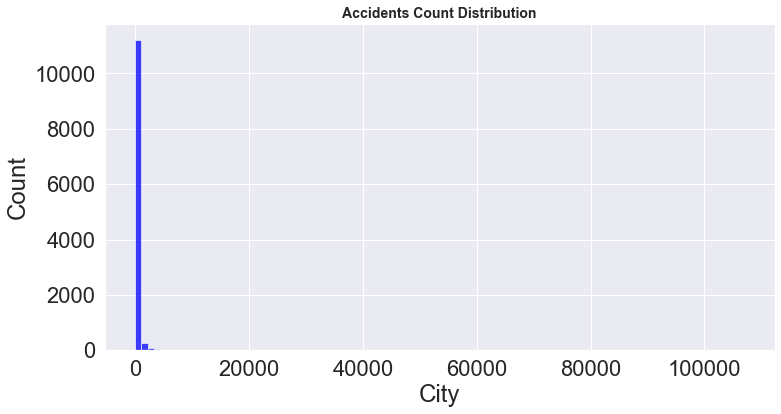

In [85]:
plt.figure(figsize = (12,6))
sns.histplot(cities_by_accident,color='blue',bins=100)
plt.title('Accidents Count Distribution',fontsize=14,fontweight="bold")
plt.show()

# Analysis on State Accidents

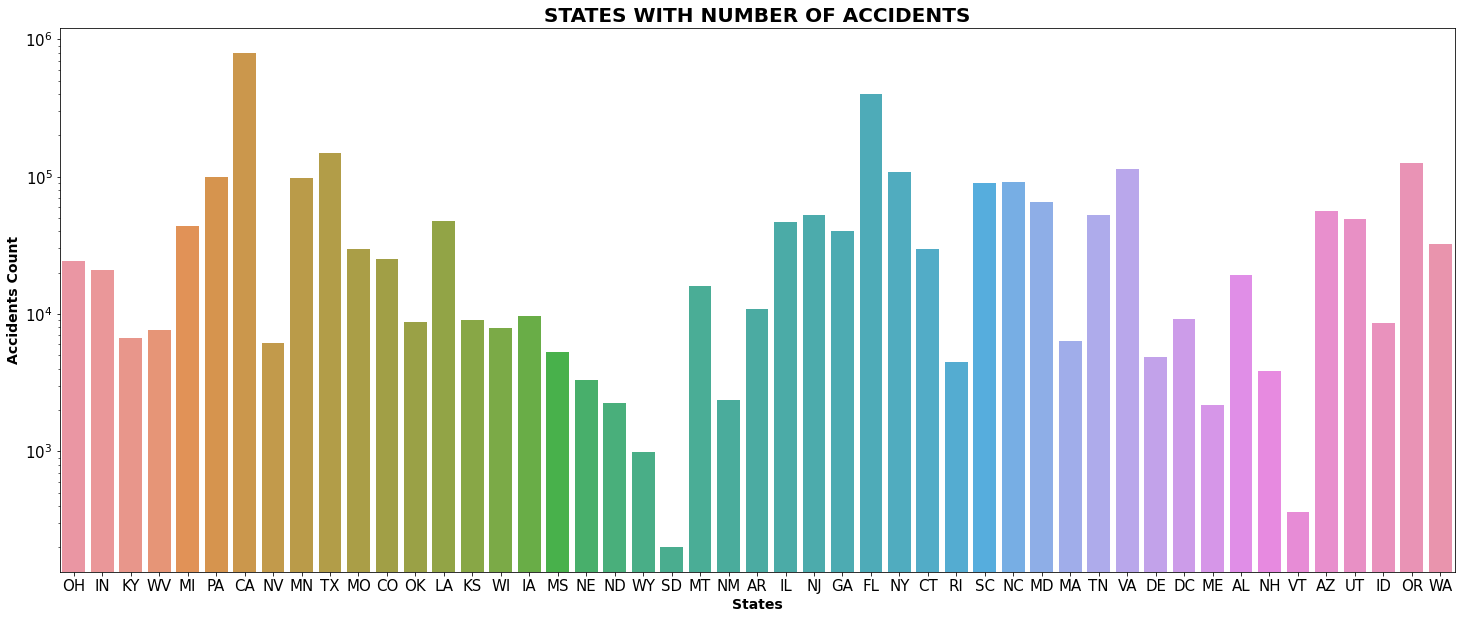

In [61]:
plt.figure(figsize=(25,10))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20,fontweight='bold')
plt.xlabel('States',fontweight="bold",fontsize=14)
plt.ylabel('Accidents Count',fontweight="bold",fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

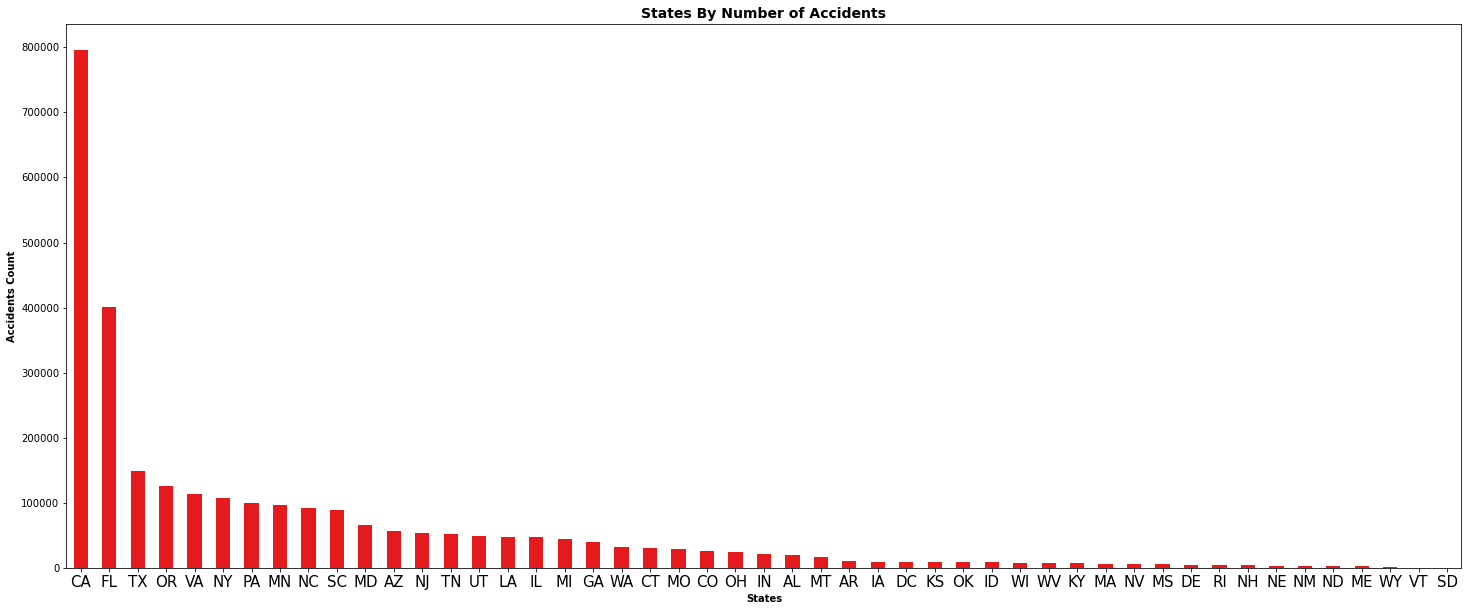

In [62]:
#Highest to lowest count for easy understanding

df["State"].value_counts().plot(kind='bar',cmap='Set1',figsize=(25,10))
plt.title('States By Number of Accidents',fontsize=14, fontweight="bold")
plt.xlabel('States',fontweight="bold")
plt.ylabel('Accidents Count',fontweight="bold")
plt.xticks(fontsize=15,rotation='horizontal')
plt.show()

# Impact of Traffic signals on States Accidents

In [63]:
df['Traffic_Signal'].value_counts()

False    2580079
True      265263
Name: Traffic_Signal, dtype: int64

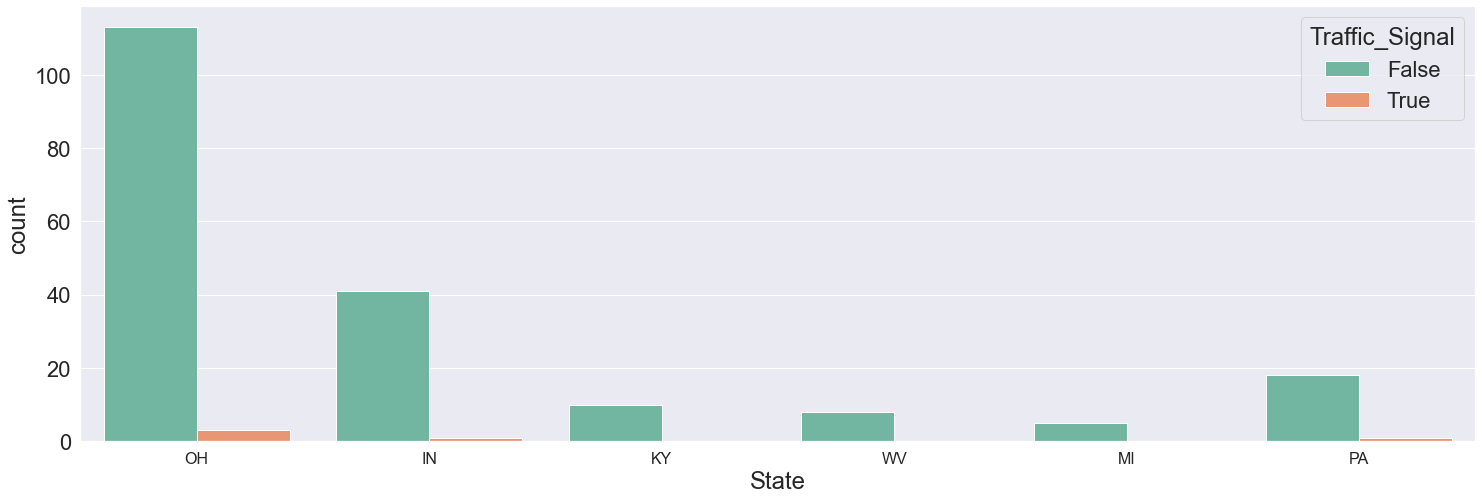

In [84]:
plt.figure(figsize=(25,8))
sns.countplot(x= df['State'][:200],hue='Traffic_Signal',data=df)
plt.title('',fontsize=18,weight='bold')
plt.xticks(fontsize=16)
plt.show()

**Most accidents happened when there was no traffic Signals.**

# Accidents Count on Street

In [65]:
df["Street"].value_counts()

I-95 N               39853
I-5 N                39402
I-95 S               36425
I-5 S                30229
I-10 E               26164
                     ...  
 Villareal Dr            1
 La Jacaranda            1
 SW 273rd Ln             1
 Silent Brook Dr         1
473-401 Cutoff Rd        1
Name: Street, Length: 159651, dtype: int64

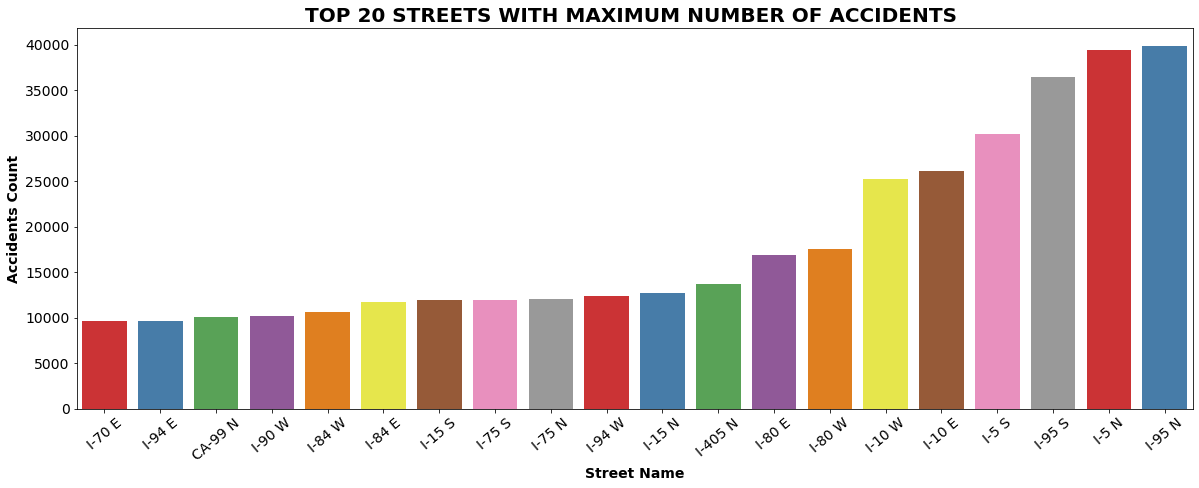

In [66]:
top_streets=df["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

plt.figure(figsize=(20,7))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"],palette='Set1')
plt.xlabel('Street Name',fontweight="bold",fontsize=14)
plt.ylabel('Accidents Count',fontweight="bold",fontsize=14)
plt.xticks(fontsize=14,rotation=40)
plt.yticks(fontsize=14)
plt.title("TOP 20 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ",fontsize=20,fontweight='bold')
plt.show()

# Which Type of Severity accident occured most

In [67]:
#df["Severity"]=df["Severity"].apply(lambda x : str(x))
accident_severity= df["Severity"].value_counts()
accident_severity

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

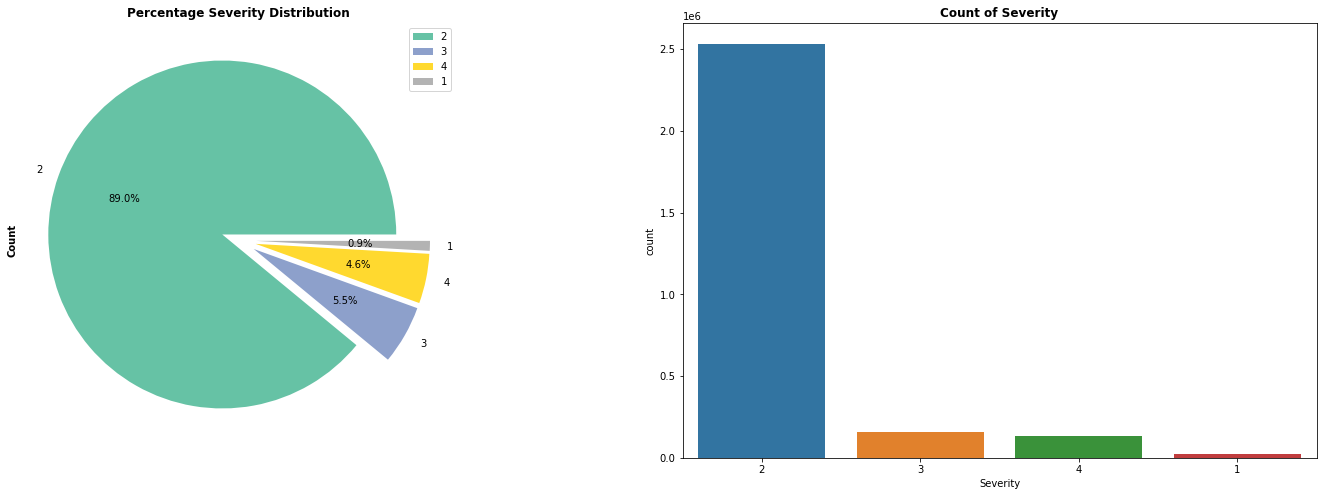

In [68]:
f,ax=plt.subplots(1,2,figsize=(25,8))
accident_severity.plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],cmap='Set2',legend=True)
ax[0].set_title('Percentage Severity Distribution',weight='bold')
ax[0].set_ylabel('Count',weight='bold')
sns.countplot('Severity',data=df,ax=ax[1], order=accident_severity.index)
ax[1].set_title('Count of Severity',weight='bold')
plt.show()

In [69]:
df['Weather_Condition'].value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

# Impact of Weather

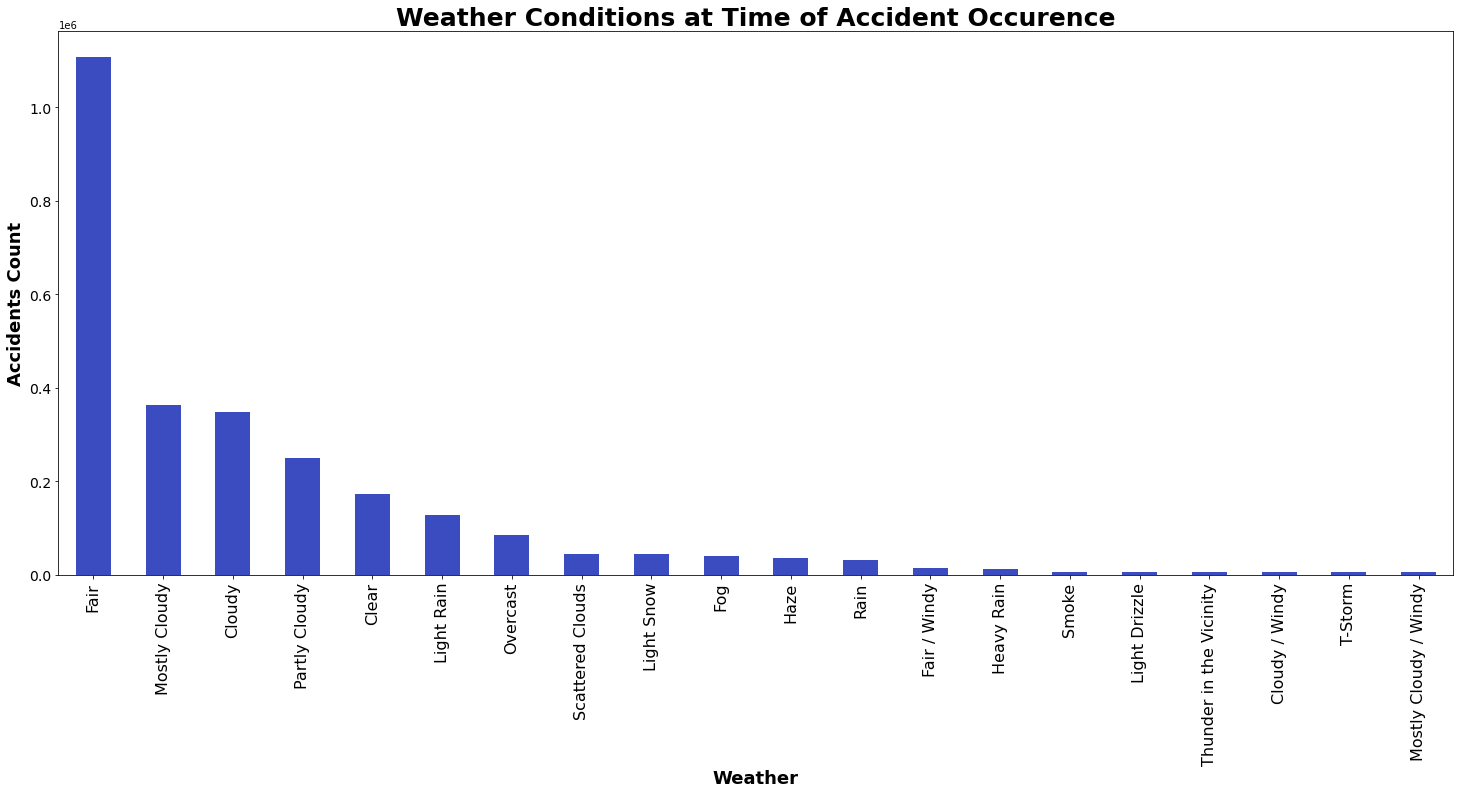

In [70]:
total_weatherCondition =df["Weather_Condition"].value_counts()[:20]
total_weatherCondition.plot(kind='bar',cmap='coolwarm',figsize=(25,10))
plt.title('Weather Conditions at Time of Accident Occurence',fontsize=25,weight='bold')
plt.xlabel('Weather',fontsize=18,weight='bold')
plt.ylabel('Accidents Count',fontsize=18,weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.show()

# Impact of Weather and Accidents Severity Level 

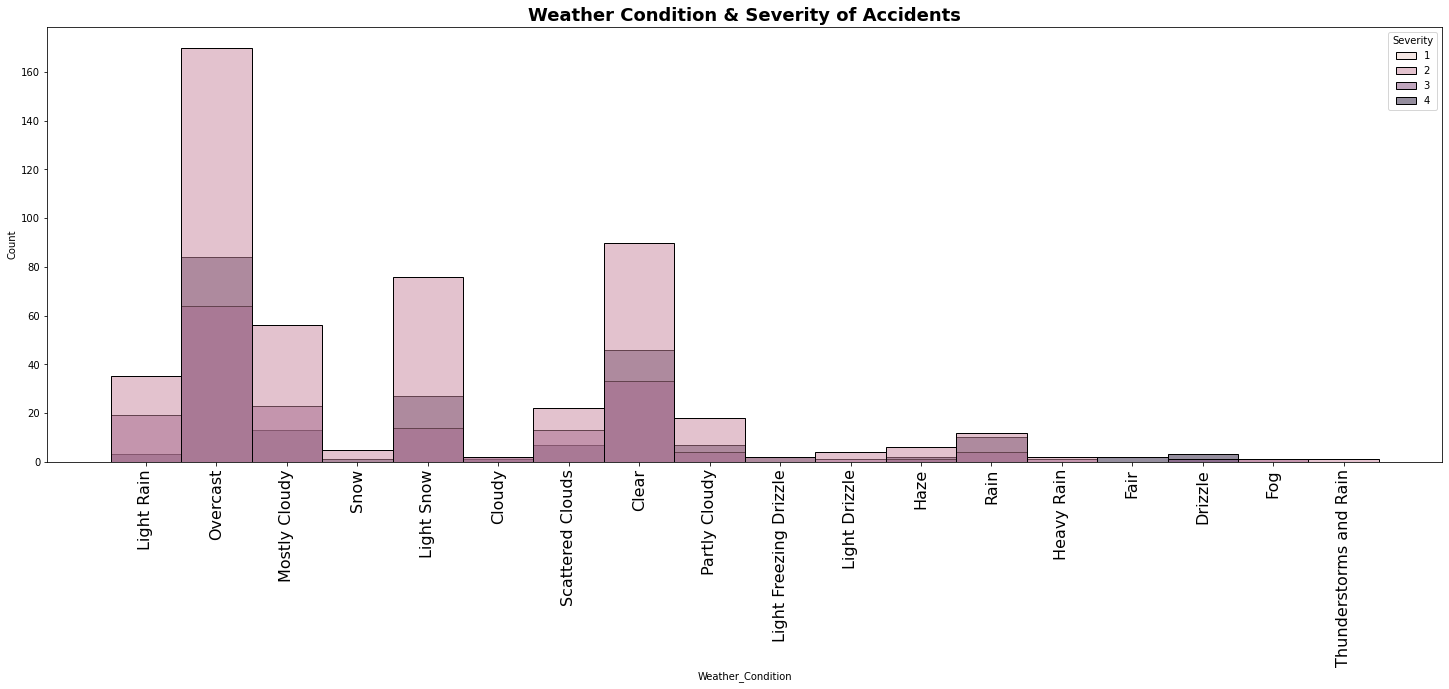

In [71]:
plt.figure(figsize=(25,8))
sns.histplot(x= df['Weather_Condition'][:900],hue='Severity',data=df)
plt.title('Weather Condition & Severity of Accidents',fontsize=18,weight='bold')
plt.xticks(fontsize=16,rotation=90)
plt.show()

**For clear understanding breakdown severity level(one by one)on Weather condion at the time of Accidents**

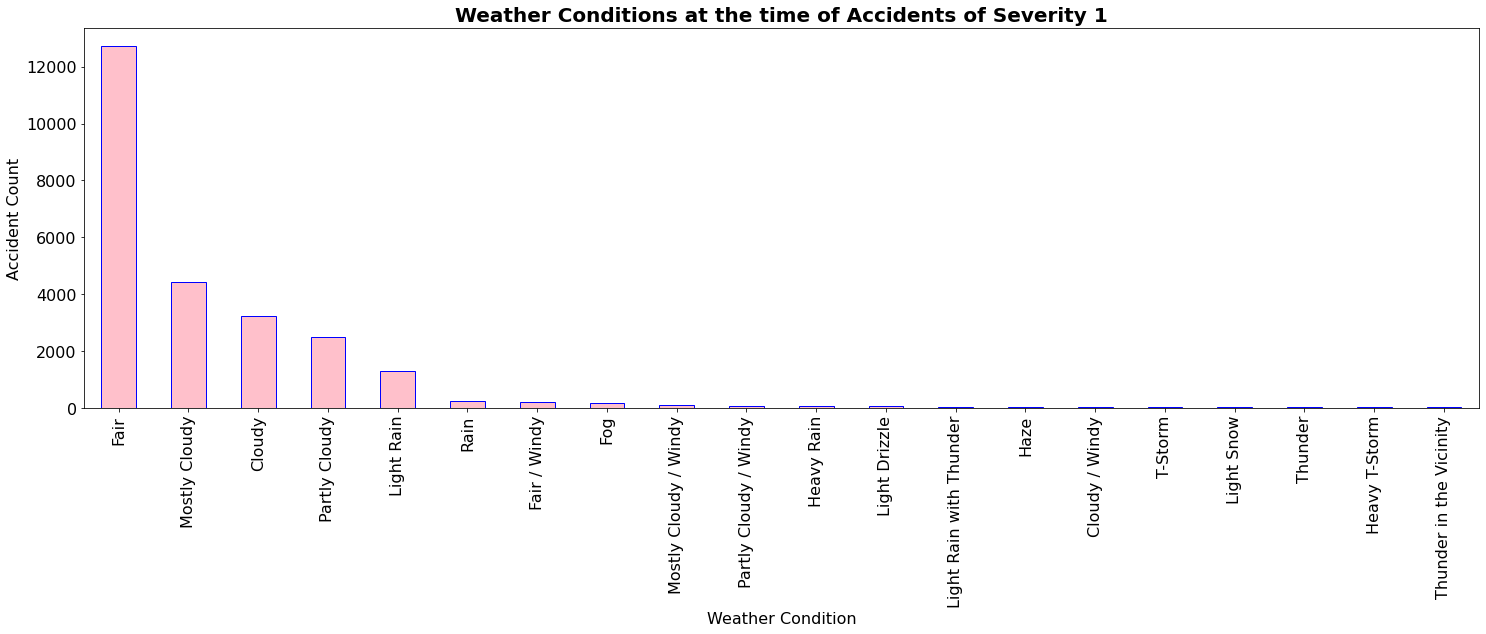

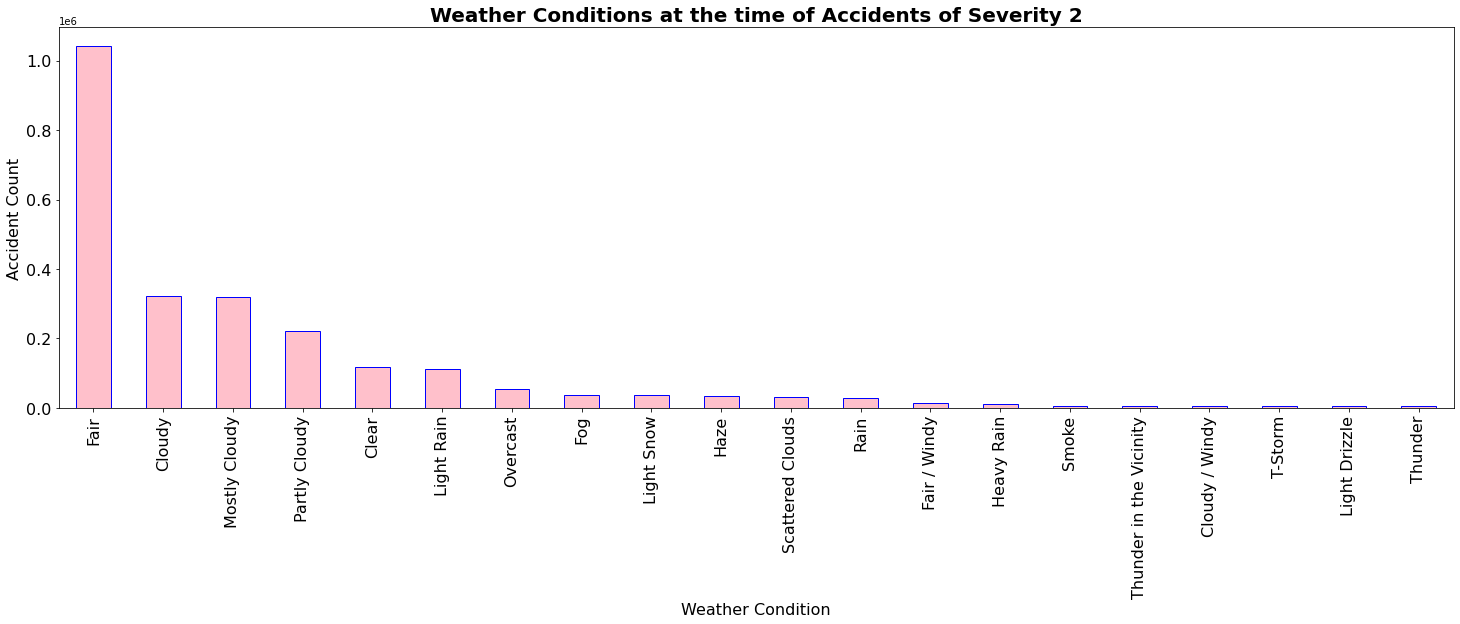

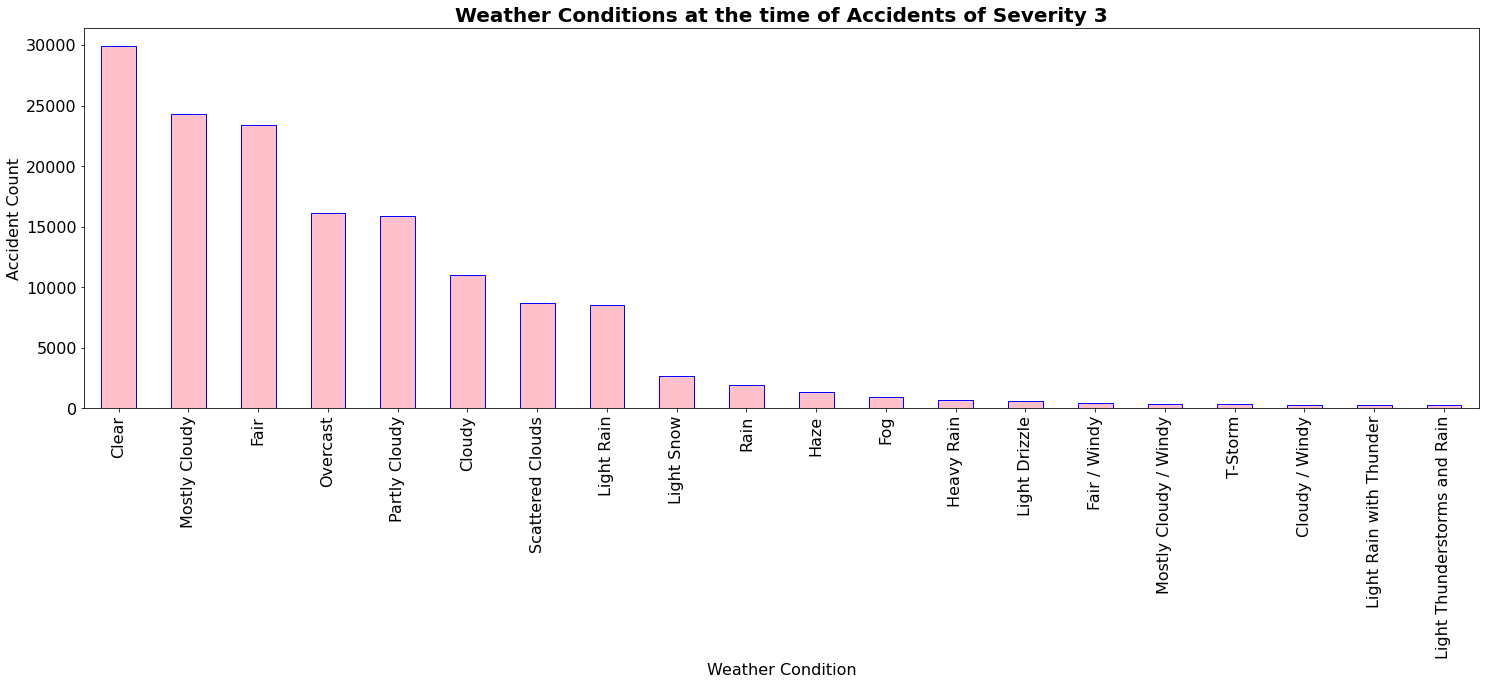

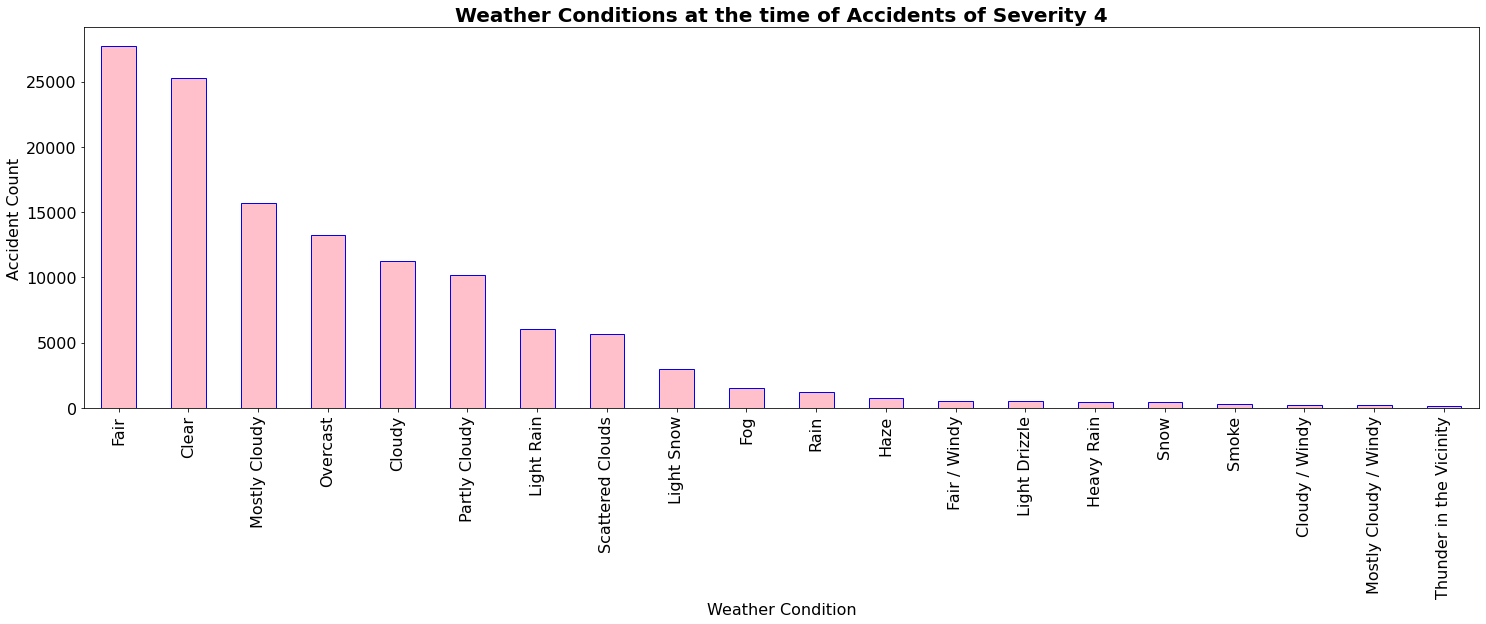

In [72]:
for x in np.arange(1,5):
    plt.subplots(figsize=(25,7))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='pink',edgecolor='b',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('Weather Conditions at the time of Accidents of Severity ' + str(x),fontsize=20,weight='bold')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

**Surprisingly, most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.**

# Impact of Wind Speed

<AxesSubplot:>

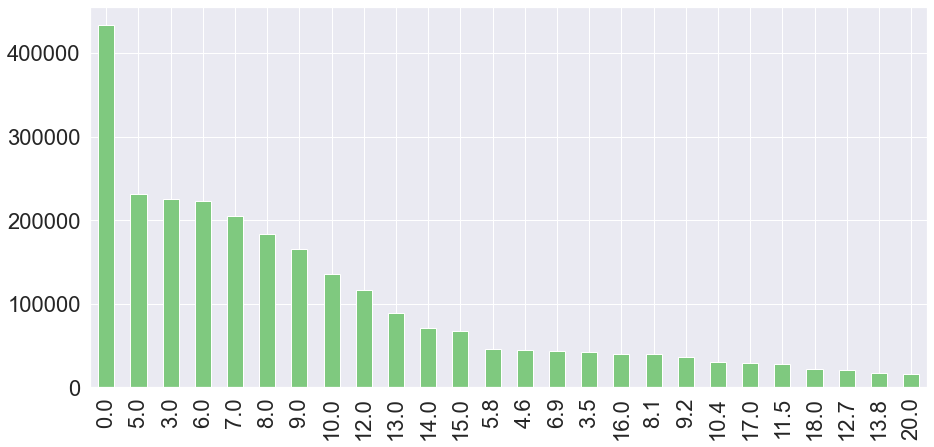

In [73]:
plt.figure(figsize=(15,7))
sns.set(font_scale=2)
df['Wind_Speed(mph)'].value_counts()[:20].plot(kind='bar',cmap='Accent')

Accidents not much affected by Wind Speed

# Impact of Temperature

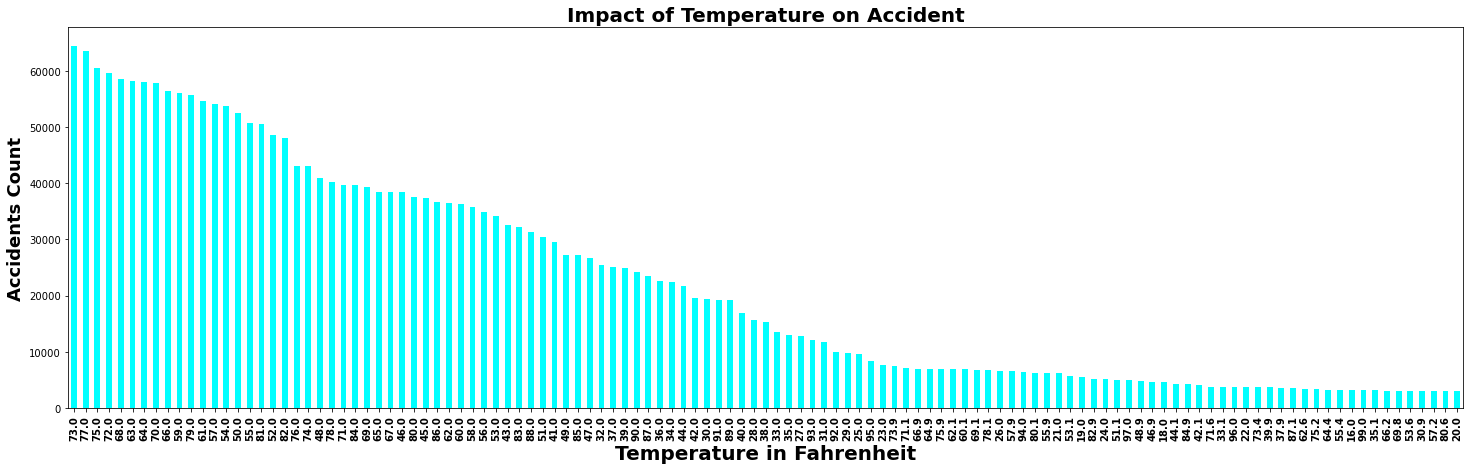

In [5]:
plt.figure(figsize=(25,7))
df['Temperature(F)'].value_counts()[:20].plot(kind='bar',cmap='cool')
plt.title('Impact of Temperature on Accident',fontsize=20,weight='bold')
plt.xlabel('Temperature in Fahrenheit',fontsize=20,weight='bold')
plt.ylabel('Accidents Count',fontsize=18,weight='bold')
plt.xticks(weight='bold')
plt.show()

# Impact of Visibility on Accidents

In [7]:
top_visibility_count = df['Visibility(mi)'].value_counts().sort_values().reset_index()
top_visibility_count.columns=["Visibility","Number_of_accidents"]

In [8]:
top_visibility_count

,Visibility,Number_of_accidents
0,19.0,1
1,54.0,1
2,16.0,1
3,0.7,1
4,34.0,1
...,...,...
71,5.0,53933
72,8.0,55955
73,9.0,68817
74,7.0,79649


<function matplotlib.pyplot.show(close=None, block=None)>

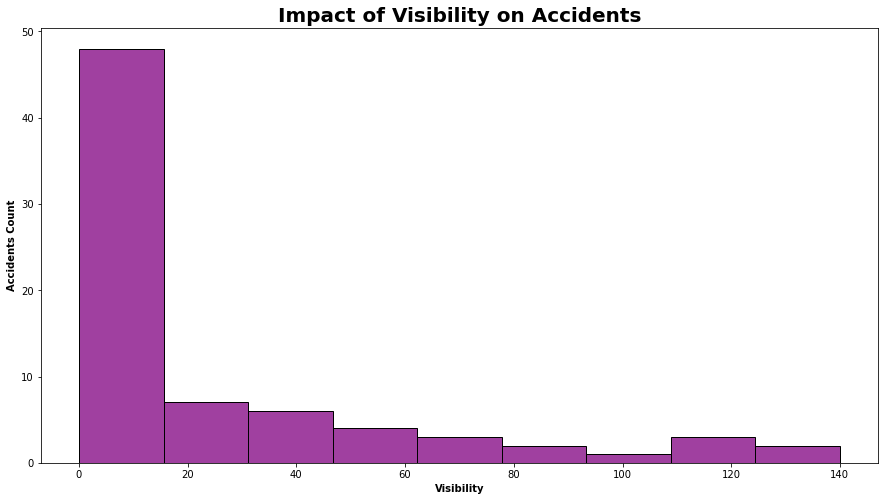

In [19]:
plt.figure(figsize=(15,8))
sns.histplot(x="Visibility",data=top_visibility_count,color='purple')
plt.title("Impact of Visibility on Accidents",fontsize=20,fontweight="bold")
plt.xlabel('Visibility',fontweight="bold")
plt.ylabel('Accidents Count',fontweight="bold")
plt.show

# Impact of Different Pressure

In [20]:
pressure_effect=df["Pressure(in)"].value_counts()
pressure_effect.sort_values().tail()

30.03    41477
30.01    41736
29.99    42978
29.94    43165
29.96    43668
Name: Pressure(in), dtype: int64

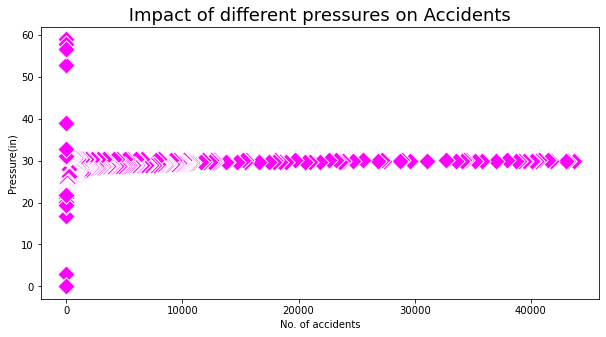

In [50]:
plt.figure(figsize=(10,5))
plt.title(" Impact of different pressures on Accidents ",size=18)
plt.xlabel('No. of accidents')
plt.ylabel('Pressure(in)')
sns.scatterplot(y=pressure_effect.index, x=pressure_effect,s=150,marker='D',color='magenta')
plt.show()

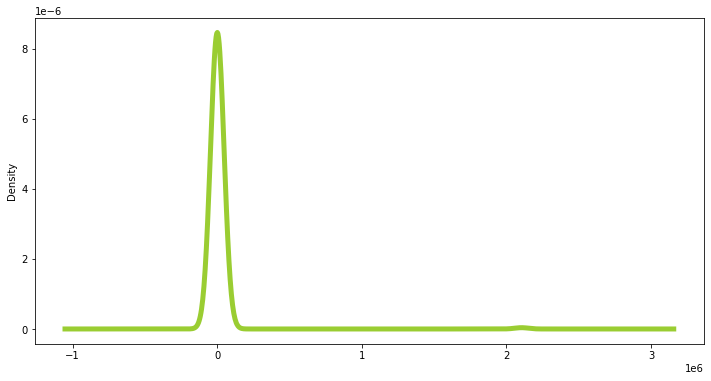

In [65]:
df['Precipitation(in)'].value_counts().plot(kind='kde',figsize=(12,6),color='yellowgreen',linewidth=5)
plt.show()

* Rain(Precipitation) is not the reason for accidents,it is hardly affected.

# Showing Side of Accidents

In [78]:
# Moving on, what side of the road are accidents happening?

side_of_road =  df['Side'].value_counts()
side_of_road

R    2353309
L     492032
N          1
Name: Side, dtype: int64

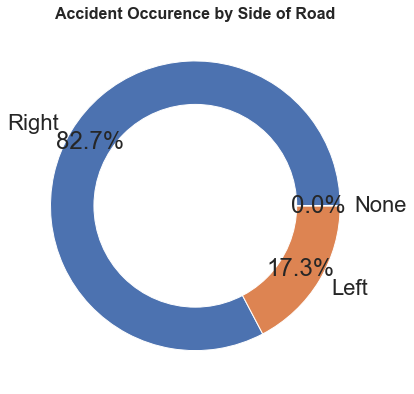

In [79]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = ['Right','Left','None']
plt.pie(side_of_road, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident Occurence by Side of Road",fontsize=16,weight='bold')
plt.tight_layout()
plt.show()

**More accidents are happening on the right side of the roads**

# Timezones with accidents Count

In [80]:
df['Timezone'].value_counts()

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64

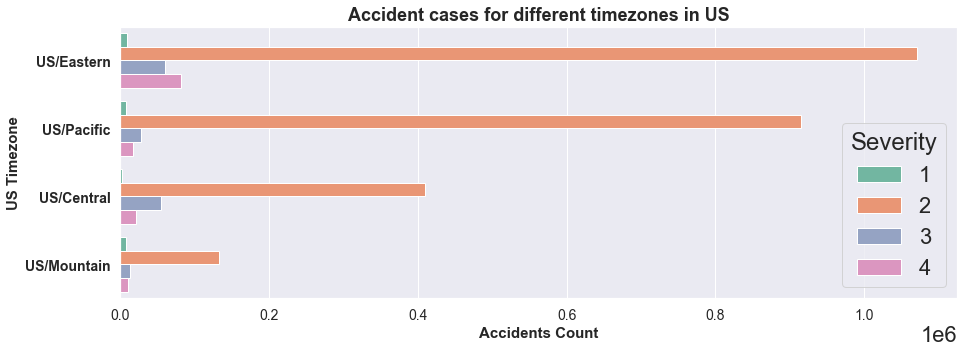

In [81]:
sns.set_palette("Set2")
plt.figure(figsize=(15,5))
sns.countplot(y=df['Timezone'],data=df,hue='Severity')
plt.title('Accident cases for different timezones in US',fontsize=18,weight='bold')
plt.ylabel('US Timezone',fontsize=15,weight='bold')
plt.xlabel('Accidents Count',fontsize=15,weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14,weight='bold')
plt.show()

**Insights**

* A large proportion of accidents are classified at severity level 2
* Level "1" and "4" accidents seem to be the rarest
* The East Coast has the most accidents.
* The mountainous areas have the fewest.

# Map of accidents,color code by County

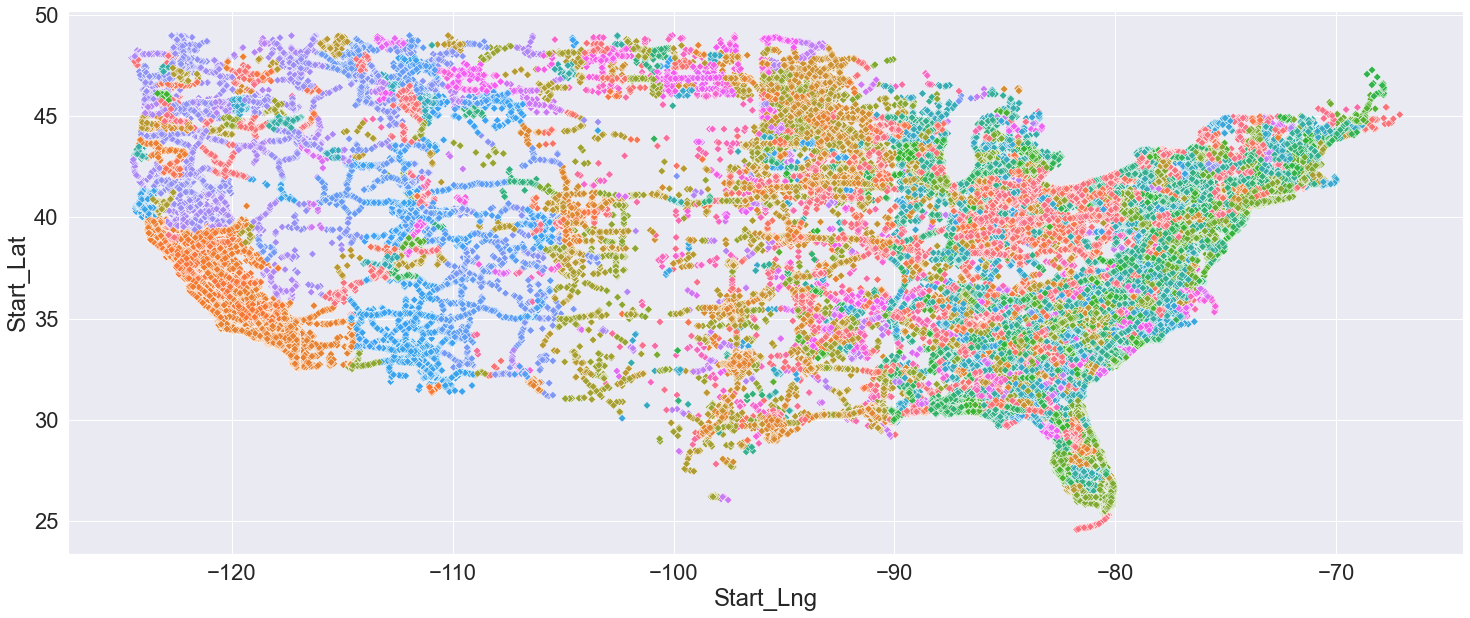

In [82]:
plt.figure(figsize = (25,10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='County', legend=False, s=30,marker='D')
plt.show()

# US Map which shows the severity of the accidents

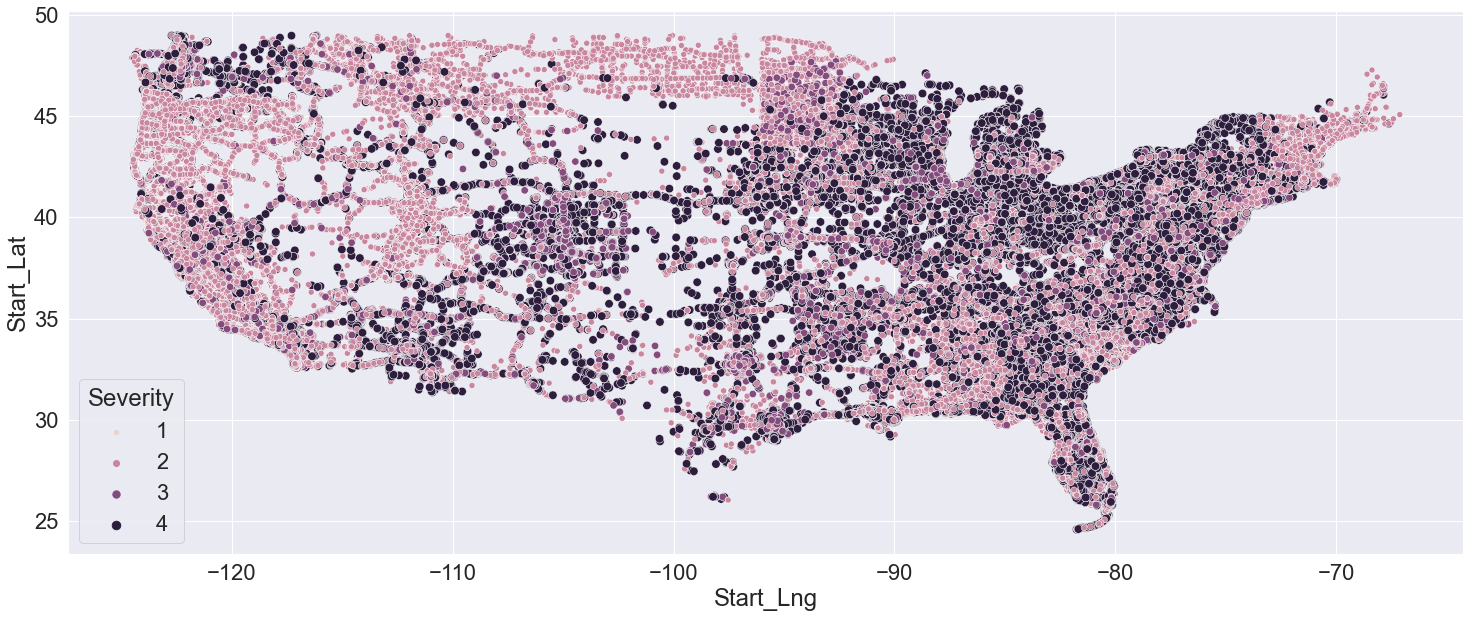

In [83]:
plt.figure(figsize = (25,10))
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,data=df,size=df.Severity, hue=df.Severity)
plt.show()

# REPORT


Analysis tells that majority of accidents have severity ~2 means not much higher impact on traffic.

in approx 75% cases no precipitation was recorded so this could mean rain is not the reason for accidents.

on an avg accidents happen even while the visibility is ~9 miles so this could mean that visibility is not a reason.

average length of the road extent affected by the accident is 7 miles.

Miami(CITY) had most no of accident cases i.e 106966

Top 5 Cities which had most number of cases are

Miami 106966
Los Angeles 68956
Orlando 54691
Dallas 41979
Houston 39448
Cities which had least no of accidents are

Ridgedale 1
Sekiu 1
Wooldridge 1
Bullock 1
American Fork-Pleasant Grove 1
CA (STATE) had most no of accident cases i.e 795868

Top 5 States of US which had most no accident cases are:

CA 795868
FL 401388
TX 149037
OR 126341
VA 113535
US/Eastern timezone region reported the most number of accident cases.

I-95 N street had max accident cases i.e 39853

Most accident occurs between 2:00PM - 6:00PM

most-deadliest accident hour is 5:00PM

next highest accident occur between 7:00AM - 8:00AM

friday had the highest no of accident cases i.e 492074.

accident cases are less during weekends i.e satuday and sunday and evenly distributed during business days.

Most no of cases are occured during December i.e 473943

at the end of the year the number of accidents is quite high ie during december,november,october had most no of accidents

year 2021 had max no of accidents i.e 1511745

trend is increasing exponentially yearly .
sharp rise after year 2020.

maximum no of cases occured between temperature range: 50-80 F.

maximum no of cases occured between humidity range: 80-100 %.

as the humidity increases the no of cases also increases.

Maximum cases occured for the wind speed range between 5(mph) - 10(mph)

This is normal wind speed hence it is not the reason for accidents.

max no of accident occured when the air pressureis between 20(in) to 30(in).

30(in) had max accidents

Weather condition was Fair in most of the cases hence it is not a major cause behind the accidents.

THANK YOU